### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Data preparation

In [2]:
df = pd.read_csv("../db/wine/winequality-red.csv", delimiter=";")

# normalization
df.iloc[:,0:-1] = df.iloc[:,0:-1].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

train=df.sample(frac=0.7, random_state=777)
test=df.drop(train.index)

X = train[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
Y = train['quality']

### Perceptron class

In [3]:
class Perceptron:
    def __init__(self, in_size):
        self.epochs = 5000
        # initialize weigth and bias
        self.weigth = np.zeros(in_size)
        self.bias = 0
    
    def learn(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)
        self.n = len(self.x)
        
        costs = []
        for epoch in range(0, self.epochs):
            self._update_parameters()
            if epoch % 1 == 0:
                costs.append([epoch, self._cost()])
        return np.array(costs)

    def predict(self, x):
        return np.sum(x * self.weigth, axis=1) + self.bias

    def _update_parameters(self, alpha=0.05):
        del_w, del_b = self._gradient()
        self.weigth -= del_w * alpha
        self.bias -= del_b * alpha

    def _diff(self):
        yT = np.repeat(self.y, self.x.shape[1]).reshape(self.x.shape)
        return (self.weigth * self.x + self.bias) - yT

    def _cost(self):
        return np.sum(self._diff() ** 2)
    
    def _gradient(self):
        diff = self._diff()
        del_w = 1/self.n * 2 * np.sum(self.x * diff, axis=0) 
        del_b = 1/self.n * 2 * np.sum(diff)

        return del_w, del_b

### Learn

[[4995.         7459.33551969]
 [4996.         7459.33551969]
 [4997.         7459.33551969]
 [4998.         7459.33551969]
 [4999.         7459.33551969]]


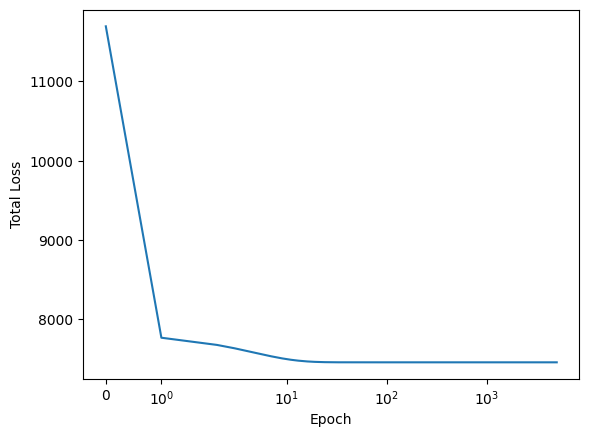

In [6]:
p = Perceptron(in_size=X.shape[1])
costs = p.learn(X, Y)
print(costs[-5:])

plt.xscale('symlog')
plt.xlabel('Epoch')
plt.ylabel('Total Loss')
plt.plot(costs[:, 0], costs[:, 1])

### Test

In [5]:
test_X = test.drop('quality', axis=1).values
test_Y = test['quality'].values

predicted = p.predict(test_X)

diff = (predicted - test_Y) ** 2
diff.sum() * 1 / len(test_Y)

0.5066453887994523